In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import flosp

In [2]:
sd = flosp.Interface("./setup.py")

flosp started.
Imported setup.py sucessfully.
Loading processed data from pickles.
Found: ./complexday/example_results/processed/ED.pkl
Found: ./complexday/example_results/processed/IP.pkl
Found: ./complexday/example_results/processed/IPSPELL.pkl
Found: ./complexday/example_results/processed/HOURLY.pkl
Found: ./complexday/example_results/processed/DAILY.pkl


In [3]:
sd.metadata.HOSPITAL_NAME

'complexday'

In [4]:
sd.metadata.RESULTS_SAVE_PATH

'./complexday/example_results/'

In [5]:
sd.load_dataED("./complexdayED.csv")

IO class called.
ARRIVAL_DTTM
TRIAGE_ASSESSMENT_DTTM
FIRSTDOC_FOR_TREATMENT_DTTM
ADM_REQUEST_DTTM
DEPARTURE_DTTM
----------------------------------------
Making callender columns from:  ARRIVAL_DTTM
----------------------------------------
Making callender columns from:  DEPARTURE_DTTM
----------------------------------------
saved file: ./complexday/example_results/processed/ED.pkl
Import completed.


In [6]:
sd.load_dataIP("./complexday.csv")

IO class called.
ADM_DTTM
DIS_DTTM
LOCATION_START
LOCATION_END
----------------------------------------
Making callender columns from:  ADM_DTTM
----------------------------------------
Making callender columns from:  DIS_DTTM
----------------------------------------
saved file: ./complexday/example_results/processed/IP.pkl
Import completed.


In [7]:
sd.make_new_tables()

----------------------------------------
saved file: ./complexday/example_results/processed/IPSPELL.pkl


C:\Users\bjk1y13\OneDrive - University of Southampton\MH030_HHFT_flow\4_Analysis\flosp\flosp\aggregation.py:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour


Calculating EDocc_total: 0 records were dropped because of missing time stamps(out of total: 368)
Calculating EDocc_breaching_patients: 0 records were dropped because of missing time stamps(out of total: 138)
Calculating EDocc_awaiting_adm: 11 records were dropped because of missing time stamps(out of total: 133)
(195, 34)
Calculating IPocc_nonelec: 0 records were dropped because of missing time stamps(out of total: 118)
Calculating IPocc_elec: 0 records were dropped because of missing time stamps(out of total: 17)
Calculating IPocc_daycases: 0 records were dropped because of missing time stamps(out of total: 60)
(195, 34)
----------------------------------------
Making callender columns from:  date
----------------------------------------
saved file: ./complexday/example_results/processed/HOURLY.pkl
----------------------------------------
Making callender columns from:  date
----------------------------------------
saved file: ./complexday/example_results/processed/DAILY.pkl


In [8]:
sd.data.HOURLY.columns

Index(['ED_arrivals', 'ED_departures', 'IP_admissions_total',
       'IP_admissions_elec', 'IP_admissions_elec_nonelec',
       'IP_admissions_nonelec', 'IP_discharges_total', 'IP_discharges_nonelec',
       'IP_discharges_elec', 'IP_discharges_elec_nonelec', 'EDocc_total',
       'EDocc_breaching_patients', 'EDocc_awaiting_adm', 'IPocc_elec',
       'IPocc_nonelec', 'IPocc_daycases', 'IPadm_minus_dis_elec_nonelec',
       'IPocc_total', 'IPocc_elec_nonelec', 'date', 'date_hour',
       'date_dayofweek', 'date_day', 'date_month', 'date_week',
       'date_dayofweek_name', 'date_year', 'date_date', 'date_flag_wkend'],
      dtype='object')

# Plotting trials

In [9]:
sd.metadata.PLOT_LIST#.query('plot_type == "hist"')#.iloc[5]['plot_name']# = 10 #.values[0]

,plot_number,plot_name,plot_type,data_required
0,1,ED attendance and admission numbers by year,hist,[ED]
1,2,ED attendance and admission numbers by year an...,hist,[ED]
2,3,Variation by admission or not,period,[ED]
3,4,Variation by admission or not,period,[ED]
4,5,Waiting time for admitted/non-admitted patient...,hist,[ED]
5,6,Waiting time distributions,period,[ED]
6,7,Waiting times by hour of day,period,[ED]
7,8,Waiting times by month of year,period,[ED]
8,9,ED arrival and departure by hour of day,period,[ED]
9,10,ED arrival and departure by hour of day (admit...,period,[ED]


              ED admissions  ED attendances  conversion ratio  Day Case  \
ARRIVAL_year                                                              
2018                    133             368              36.1        60   

              Elective  Non-Elective  
ARRIVAL_year                          
2018                17           118  


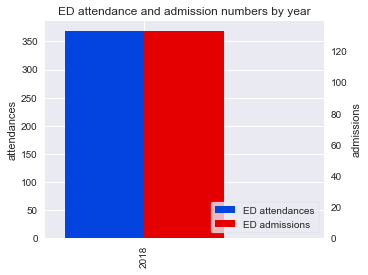

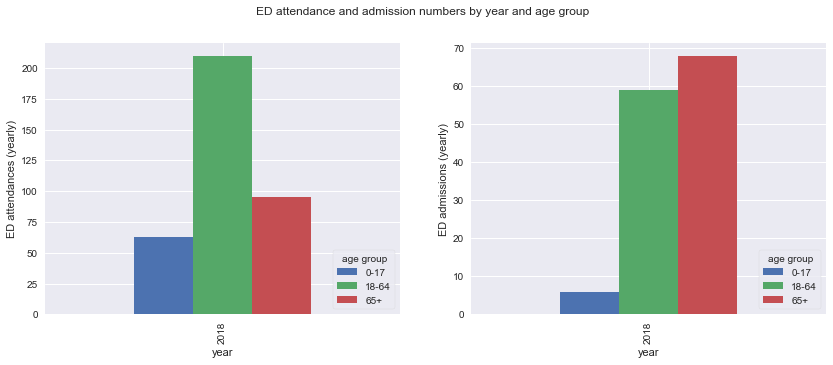

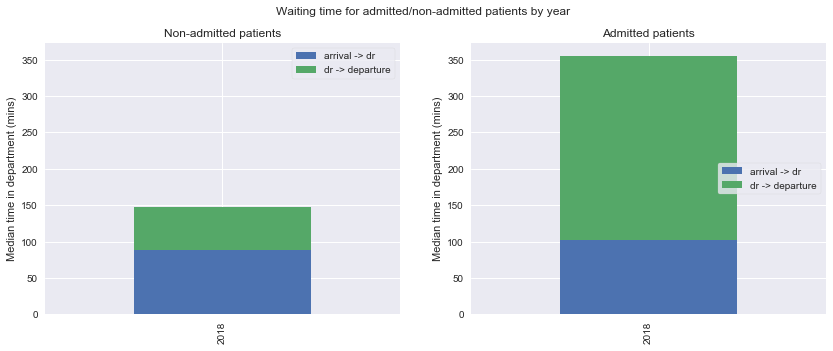

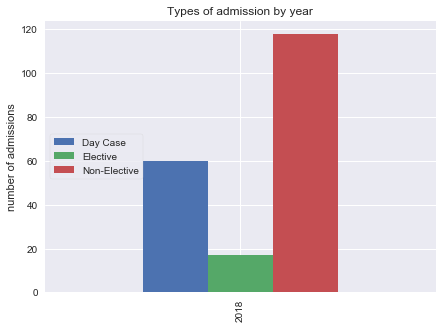

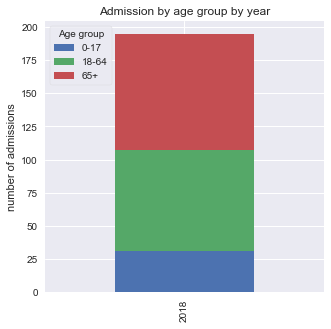

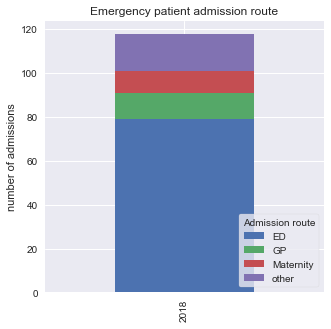

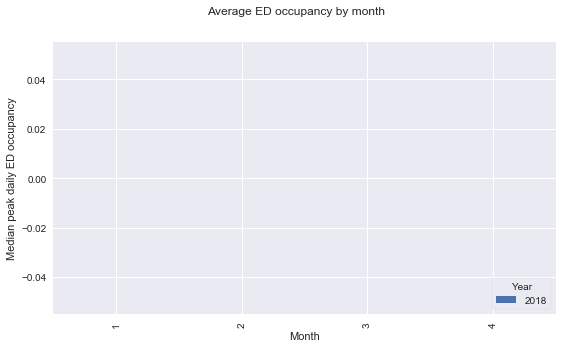

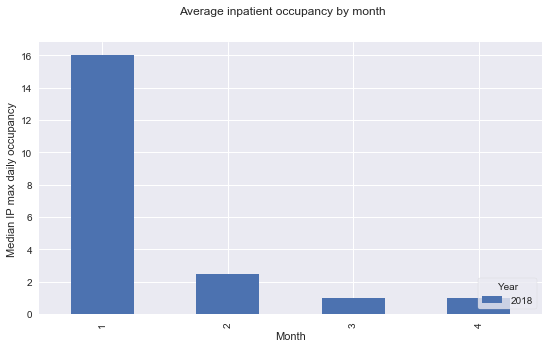

In [10]:
sd.plot_historical([2018],[2018])

2018-01-01 00:00:00
2018-01-01 00:00:00


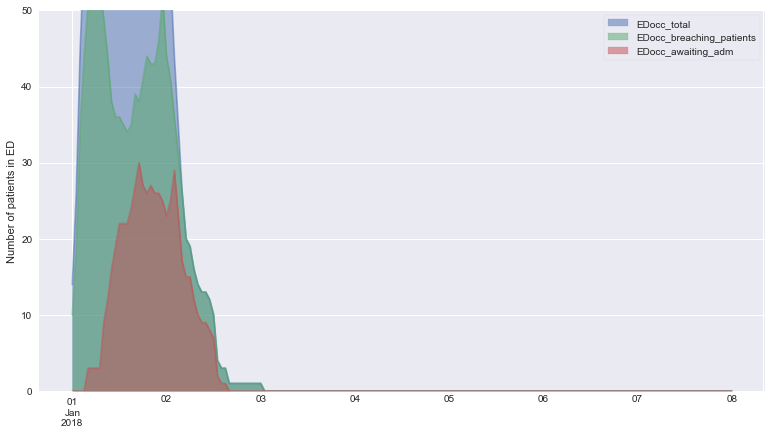

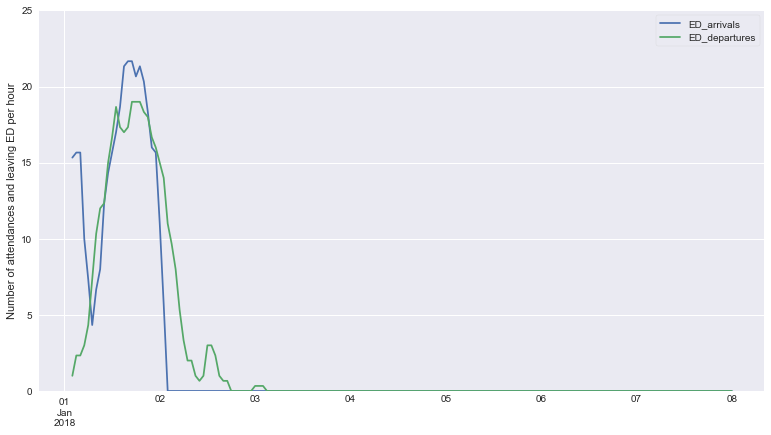

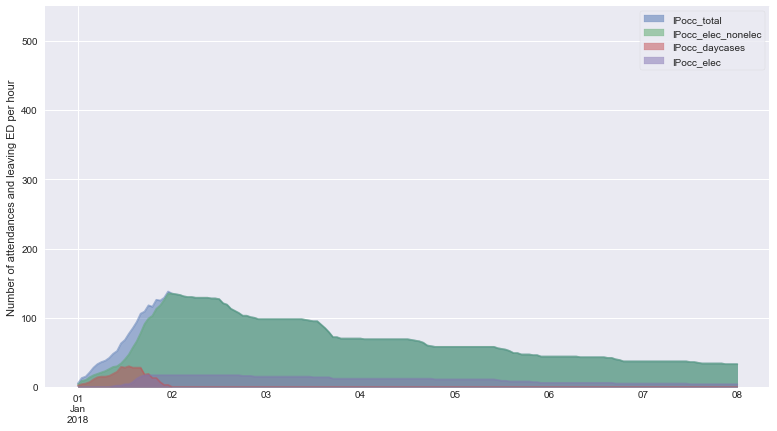

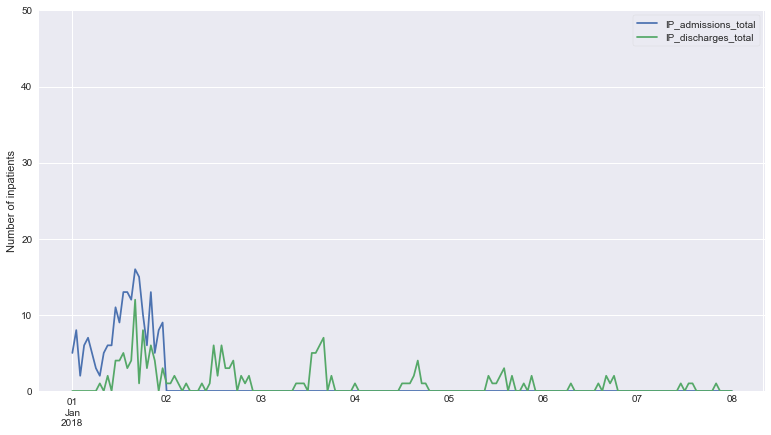

In [11]:
date = pd.datetime(2018,1,1)
sd.plot_week(date)

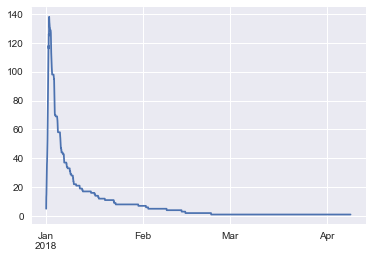

In [12]:
sd.data.HOURLY.IPocc_total.plot()

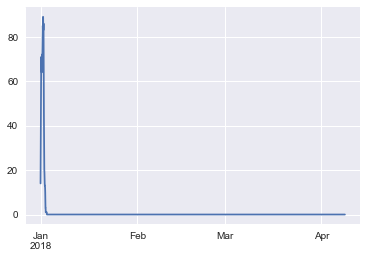

In [13]:
sd.data.HOURLY.EDocc_total.plot()

In [14]:
sd.data.HOURLY.IPocc_elec_nonelec.max()

135.0

In [15]:
sd.data.IP.PSEUDONYMISED_PATIENT_ID.head()

0    194111944764
1    471444716326
2    471444716326
3    667161676076
4    667161676076
Name: PSEUDONYMISED_PATIENT_ID, dtype: object

In [16]:
sd.data.IPSPELL.ADM_TYPE.value_counts()

Non-Elective    118
Day Case         60
Elective         17
Name: ADM_TYPE, dtype: int64

In [17]:
sd.data.HOURLY

,ED_arrivals,ED_departures,IP_admissions_total,IP_admissions_elec,IP_admissions_elec_nonelec,IP_admissions_nonelec,IP_discharges_total,IP_discharges_nonelec,IP_discharges_elec,IP_discharges_elec_nonelec,...,date,date_hour,date_dayofweek,date_day,date_month,date_week,date_dayofweek_name,date_year,date_date,date_flag_wkend
2018-01-01 00:00:00,14.0,0.0,5.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2018-01-01 00:00:00,0,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 01:00:00,12.0,1.0,8.0,0.0,6.0,6.0,0.0,0.0,0.0,0.0,...,2018-01-01 01:00:00,1,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 02:00:00,20.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,2018-01-01 02:00:00,2,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 03:00:00,15.0,4.0,6.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,...,2018-01-01 03:00:00,3,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 04:00:00,12.0,1.0,7.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2018-01-01 04:00:00,4,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 05:00:00,3.0,4.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2018-01-01 05:00:00,5,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 06:00:00,7.0,8.0,3.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2018-01-01 06:00:00,6,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 07:00:00,3.0,10.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,...,2018-01-01 07:00:00,7,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 08:00:00,10.0,13.0,5.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,...,2018-01-01 08:00:00,8,0,1,1,1,Monday,2018,2018-01-01,0
2018-01-01 09:00:00,11.0,13.0,6.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,...,2018-01-01 09:00:00,9,0,1,1,1,Monday,2018,2018-01-01,0


In [18]:
occ = sd.data.DAILY

In [19]:
occ.columns

Index(['ED_arrivals', 'ED_departures', 'IP_admissions_elec_nonelec',
       'IPocc_elec_nonelec_MEAN', 'IPocc_total_MEAN', 'IPocc_total_MAX',
       'IPocc_elec_nonelec_MAX', 'EDocc_total_MAX',
       'IP_admissions_elec_nonelec_MAX', 'IP_discharges_elec_nonelec_PRE12',
       'date', 'date_hour', 'date_dayofweek', 'date_day', 'date_month',
       'date_week', 'date_dayofweek_name', 'date_year', 'date_date',
       'date_flag_wkend'],
      dtype='object')

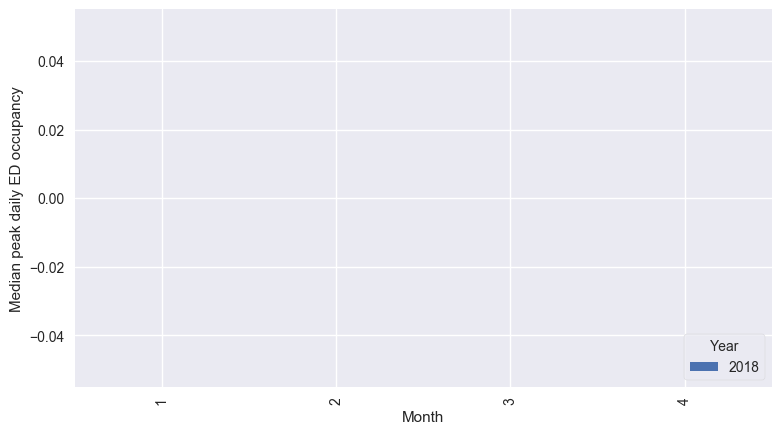

In [20]:
fig,ax = plt.subplots(figsize=(9,5),dpi=100)
occ.groupby(['date_month','date_year']).median()['EDocc_total_MAX'].unstack().plot(kind='bar',ax=ax)
#occBASd[['EDocc_tot','dt_month']].boxplot(by='dt_month',ax=ax);
#ax.set_xticklabels(daysofweek);
ax.set_xlabel('Month');
ax.set_ylabel('Median peak daily ED occupancy');
fig.suptitle('');
#ax.set_title('ED occupancy');
ax.legend(loc='lower right',frameon=True,title='Year')


In [21]:
import itertools

def count_hourly_occupancy(df,datetime_col_start,datetime_column_end, new_column_name,query = None):
    """
    Function takes patient record level dataframe and calculates the occupancy/activity for each hour of the day.
    The activity is defined based on the two datetime columns being provided.
    e.g. if 'attendnace datetime' and 'departure datetime' were given then the 'activity' would be the occupancy of the department.

    Inputs
    ======
    df, pandas dataframe, with patient-record level activity.
    datetime_col_start, str, name of column in df when the activity begins. Column must be in datetime format.
    datetime_col_end, str, name of column in df when the activity ends. Column must be in datetime format.
    new_col_name, str, name to assign the new column that is produced.
    query, str, optional, sql-style query called on df using df.query('input string query here').

    Output
    ======
    df, pandas dataframe, datetime index at hourly level, single column containing the count of activity in that hour
    (index potentially not continuous).
    """
    # if query present filter dataframe with it
    if query != None:
        df = df.query(query)

    #### Statement for user to see how many erroneous values have been
    no_records_dropped = df.shape[0] - df.dropna(subset=[datetime_col_start,datetime_column_end]).shape[0]
    no_records = df.shape[0]

    print('Calculating ' + new_column_name + ': ' + str(no_records_dropped) + ' records were dropped because of missing time stamps' + '(out of total: ' + str(no_records) + ')')

    #### to avoid errors drop all rows that have no times. NOTE: should consider a warning of the number of dropped rows here.
    # NOTE: this will remove patients who are currently in system...and so those admitted at time of extract will be removed. (recent results will be erroneous.).
    df1 = df.dropna(subset=[datetime_col_start,datetime_column_end])

    #### setup data to be quicker/easier to compute, 
#         df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour
    df1 = df1[[datetime_col_start,datetime_column_end]].copy()
    df1[datetime_col_start] = df1[datetime_col_start].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[datetime_column_end] = df1[datetime_column_end].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1)
    # original code below (before check for if copy makes a difference). 
    # df1 = df1[[datetime_col_start,datetime_column_end]].copy()
    # df1[datetime_col_start] = df1[datetime_col_start].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    # df1[datetime_column_end] = df1[datetime_column_end].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1)
    
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[datetime_column_end] - df1[datetime_col_start])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).

    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces 
    # - create a (long format) list of links between attendance numbers and 
    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0 # initialise row counter for empty arrays
    
    # iterate through rows of df
    for row in df1.itertuples():
        atten_id = [row[1]] # get attendance id
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # make a list datetimes for each hour that patient is active.

        # populate empty arrays with seperate list of ids and timestamps.  
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient number to array
            timestamps[row_count] = i[1] # 
            row_count += 1 # add to row count for new id-> hour pair
    
    # put ids and timestamps into df
    data = {'atten_id':ids,'hours':timestamps}
    df_new = pd.DataFrame(data=data)
    
    # count isntances for each hour
    df_new = df_new.groupby(['hours']).count()
    
    # Tidy colum names
#     df_new.set_index('hours', inplace=True)
    df_new.index.name = '' # remove 'hours' as index name
    
    df_new.rename(columns = {'atten_id' : new_column_name}, inplace = True) # rename to final column name.

    return df_new

In [22]:
sd.data.HOURLY.IPocc_total

2018-01-01 00:00:00      5.0
2018-01-01 01:00:00     13.0
2018-01-01 02:00:00     15.0
2018-01-01 03:00:00     21.0
2018-01-01 04:00:00     28.0
2018-01-01 05:00:00     33.0
2018-01-01 06:00:00     36.0
2018-01-01 07:00:00     38.0
2018-01-01 08:00:00     42.0
2018-01-01 09:00:00     48.0
2018-01-01 10:00:00     52.0
2018-01-01 11:00:00     63.0
2018-01-01 12:00:00     68.0
2018-01-01 13:00:00     77.0
2018-01-01 14:00:00     85.0
2018-01-01 15:00:00     94.0
2018-01-01 16:00:00    106.0
2018-01-01 17:00:00    109.0
2018-01-01 18:00:00    118.0
2018-01-01 19:00:00    116.0
2018-01-01 20:00:00    126.0
2018-01-01 21:00:00    125.0
2018-01-01 22:00:00    129.0
2018-01-01 23:00:00    138.0
2018-01-02 00:00:00    135.0
2018-01-02 01:00:00    134.0
2018-01-02 02:00:00    133.0
2018-01-02 03:00:00    131.0
2018-01-02 04:00:00    130.0
2018-01-02 05:00:00    130.0
                       ...  
2018-04-07 08:00:00      1.0
2018-04-07 09:00:00      1.0
2018-04-07 10:00:00      1.0
2018-04-07 11:

In [23]:
count_hourly_occupancy(sd.data.IPSPELL, 'ADM_DTTM', 'DIS_DTTM','total')

Calculating total: 0 records were dropped because of missing time stamps(out of total: 195)


,total
,
2018-01-01 00:00:00,5
2018-01-01 01:00:00,13
2018-01-01 02:00:00,15
2018-01-01 03:00:00,21
2018-01-01 04:00:00,28
2018-01-01 05:00:00,33
2018-01-01 06:00:00,36
2018-01-01 07:00:00,38
2018-01-01 08:00:00,42


In [24]:
pat.columns

NameError: name 'pat' is not defined

In [ ]:
pat = sd.data.ED

ax = plt.subplot()
pat.groupby(['ARRIVAL_year','age_group']).count()['PSEUDONYMISED_PATIENT_ID'].unstack().plot(kind='bar',ax=ax);
ax.set_ylabel('ED attendances (yearly)');
ax.set_xlabel('year');
#ax.set_xticks([2013,2014,2015,2016,2017]);
ax.legend(title = 'age group',frameon=True,loc='lower right');


In [ ]:
ax = plt.subplot()
pat[pat.ADMISSION_FLAG == 1].groupby(['ARRIVAL_year','age_group']).count()['PSEUDONYMISED_PATIENT_ID'].unstack().plot(kind='bar',ax=ax);
ax.set_ylabel('ED admissions (yearly)');
ax.set_xlabel('year');
ax.legend(title = 'age group',frameon=True,loc='lower right');


In [ ]:
sd.data.HOURLY.columns

In [ ]:
occ.columns

In [ ]:
# ax = plt.subplot()
fig, ax = plt.subplots()
width= 0.2

yearly['ED attendances'].plot.bar(ax=ax,position=1,width=width,color='xkcd:blue',figsize=(6,4))
ax2 = ax.twinx()
yearly['ED admissions'].plot.bar(ax=ax2,position=0,width=width,color='xkcd:red')
ax2.grid(False);

ax.set_ylabel('attendances');
ax2.set_ylabel('admissions');
ax.set_xlabel('')
## sort legend
#lns = lns1+lns2
#labs = ['attendances','admissions']

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right',frameon=True)

#ax.legend(lns, labs, loc=0)
#ax.legend(labs,frameon=True);


In [ ]:
ARRIVAL_DTTM
DEPARTURE_DTTM

In [ ]:
sd.data.ED.columns

In [ ]:
years = [2014,2015,2018]

In [ ]:
str(years)

In [ ]:
sd.data.ED.query('ARRIVAL_year in ' + str(years) +' or DEPARTURE_year in [2014,2015] ')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
s = pd.datetime(2018,1,1)
e = pd.datetime(2018,2,1)
sd.plot_period(s,e,15)

In [ ]:
s = pd.datetime(2018,1,1)
e = pd.datetime(2018,2,1)
sd.plot_week(s,24)

In [ ]:
pat.columns

In [ ]:
yearly

In [ ]:
pat = sd.data.ED
yearly = pat.groupby('ARRIVAL_year').agg({'PSEUDONYMISED_PATIENT_ID':'count','ADMISSION_FLAG':'sum'})[1:-1]

yearly.rename(columns={'ADMISSION_FLAG':'ED admissions','PSEUDONYMISED_PATIENT_ID':'ED attendances'},inplace=True)

yearly['conversion ratio'] = 100* yearly['ED admissions'] / yearly['ED attendances']

ax = plt.subplot()

width= 0.2

yearly['ED attendances'].plot.bar(ax=ax,position=1,width=width,color='xkcd:blue',figsize=(6,4))
ax2 = ax.twinx()
yearly['ED admissions'].plot.bar(ax=ax2,position=0,width=width,color='xkcd:red')
ax2.grid(False);

ax.set_ylabel('attendances');
ax2.set_ylabel('admissions');
ax.set_xlabel('')
## sort legend
#lns = lns1+lns2
#labs = ['attendances','admissions']

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right',frameon=True)

#ax.legend(lns, labs, loc=0)
#ax.legend(labs,frameon=True);


In [ ]:
sd.metadata.PLOT_LIST.query('plot_type == "hist"')#['plot_name'].values[0]

In [ ]:
sd.metadata.PLOT_LIST.loc[9].plot_name

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pat2 = sd.data.ED
wait_col = ['arr_dr_wait','dr_dep_wait']


wait_col2 = ['arr_dr_wait','dr_adm_req_wait','adm_req_dep_wait','dr_dep_wait']

fig, ax = plt.subplots()
pat2.groupby('ADMISSION_FLAG')[wait_col2[0],wait_col2[3]].median().plot.bar(stacked=True,ax=ax,figsize=(4,4))
ax.set_xticklabels(['non-admission','admission']);
ax.set_ylabel('Median time in department (mins)');
ax.set_xlabel('');
ax.legend(['arrival -> dr','dr -> departure'],frameon=True);


In [ ]:
sd.data.ED.columns

In [ ]:
sd.data.plots.fig1

In [ ]:
sd.data.plots.fig1

In [ ]:
sd.data.plots.table1

In [ ]:
plots_dict = {
    'plot_number':[
        1,
        2,
        3,
    ],
    'plot_title':[
        ''
    ]
}

In [ ]:
sd.data.plots

pat = sd.data.ED

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sd.data.ED.columns

## period analysis

dt_start = pd.datetime(2017,1,1)
dt_end = pd.datetime(2018,2,1)
mask = (pat['ARRIVAL_DTTM'] > dt_start) & (pat['DEPARTURE_DTTM'] < dt_end)
# pat.query('ARRIVAL_DTTM > dt_start')
# pat[mask]

#### ED hourly arrival discharge curves
# filter for period selected

# make table for plot

arr = pat[['ARRIVAL_hour','PSEUDONYMISED_PATIENT_ID']].groupby(['ARRIVAL_hour']).count()#.plot(ax=ax)
dep = pat[['DEPARTURE_hour','PSEUDONYMISED_PATIENT_ID']].groupby(['DEPARTURE_hour']).count()#.plot(ax=ax)

arr.rename(columns={'PSEUDONYMISED_PATIENT_ID':'Arrivals'},inplace=True)
dep.rename(columns={'PSEUDONYMISED_PATIENT_ID':'Departures'},inplace=True)
table = arr.merge(dep, left_index=True, right_index=True)

# plot
fig, ax = plt.subplots()
plt.suptitle('ED average hourly arrivals & departures')
table.plot(ax=ax)
ax.set_xticks(np.arange(0,25,2));

In [ ]:
fig

In [ ]:
sd.data.DAILY.plot(style='o')

In [ ]:
sd.data.HOURLY.plot()

In [ ]:
sd.data.HOURLY.sum()

In [ ]:
sd.data.IPSPELL.shape

In [ ]:
sd.data.DAILY

In [ ]:
sd.data.IP.columns

In [ ]:
ward = sd.data.IP

In [ ]:
ward.query('PSEUDONYMISED_PATIENT_ID == "100"')

In [ ]:
ward.shape

In [ ]:
ward.query('LOCATION_NUMBER == "1"').shape

In [ ]:
ward.shape

In [ ]:
ward.drop(['LOCATION_END','LOCATION_START'],axis=1).shape

In [ ]:
ward.LOCATION_NUMBER

In [ ]:
MOVE_list = [column for column in ward.columns if 'LOCATION' in column]
MOVE_list

In [ ]:
ward[MOVE_list]

In [ ]:
ward.columns

In [ ]:
ward.head()

In [ ]:
df = sd.data.HOURLY

df.between_time('0:00', '12:01')

#['ED_arrivals'].resample('D').sum()

In [ ]:
sd.data.HOURLY

In [ ]:
df.ADM_METHOD == '1'

In [ ]:
# inputs = ["1"]
df.query('ADM_METHOD in ["1"]')

In [ ]:
# inputs = ["1"]
df.query("ADM_METHOD in ['1']")

In [ ]:
test = sd.data.HOURLY

In [ ]:
sd.data.DAILY

In [ ]:
sd.data.IP.head()

In [ ]:
sd.data.ED.head()

In [ ]:
test

In [ ]:
test.shape

In [ ]:
daily_columns_list = []
for column in ['ED_arrivals','ED_departures']:
    daily_series = test[column].resample('D').sum()
    daily_columns_list.append(daily_series)
    
daily_columns_list[0]

In [ ]:
daily_columns_list = []
for column in ['ED_arrivals','ED_departures']:
    daily_series = test[column].resample('D').sum()
    daily_columns_list.append(daily_series)
    
pd.DataFrame(daily_columns_list[0])

In [ ]:
test.resample('D').sum()

In [ ]:
test.drop(index=test.index[[2,3,4,5]],inplace=True)

In [ ]:
test

In [ ]:
test.iloc[5:10].drop()

In [ ]:
sd.data.HOURLY2.head()

In [ ]:
sd.data.ED.head()

In [ ]:
sd.data.ED.DEPARTURE_DTTM

In [ ]:
sd.data.ED.columns

In [ ]:
import itertools
def count_hourly_occupancy2(df,datetime_col_start,datetime_column_end, new_column_name):
    """
    Function takes patient record level dataframe and calculates the occupancy/activity for each hour of the day.
    The activity is defined based on the two datetime columns being provided.
    e.g. if 'attendnace datetime' and 'departure datetime' were given then the 'activity' would be the occupancy of the department.

    Inputs
    ======
    df, pandas dataframe, with patient-record level activity.
    datetime_col_start, str, name of column in df when the activity begins. Column must be in datetime format.
    datetime_col_end, str, name of column in df when the activity ends. Column must be in datetime format.
    new_col_name, str, name to assign the new column that is produced.

    Output
    ======
    df, pandas dataframe, datetime index at hourly level, single column containing the count of activity in that hour
    (index potentially not continuous).
    """
    #### setup data to be easier to compute, 
#         df['event_column_name_rounded'] = df[event_column_name].apply(lambda x : x.replace(second=0, minute=0)) # round to lower hour
    df1 = df[[datetime_col_start,datetime_column_end]].copy()
    df1[datetime_col_start] = df1[datetime_col_start].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[datetime_column_end] = df1[datetime_column_end].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1)
    
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[datetime_column_end] - df1[datetime_col_start])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).

    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces 
    # - create a (long format) list of links between attendance numbers and 
    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0 # initialise row counter for empty arrays
    
    # iterate through rows of df
    for row in df1.itertuples():
        atten_id = [row[1]] # get attendance id
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # make a list datetimes for each hour that patient is active.

        # populate empty arrays with seperate list of ids and timestamps.  
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient number to array
            timestamps[row_count] = i[1] # 
            row_count += 1 # add to row count for new id-> hour pair
    
    # put ids and timestamps into df
    data = {'atten_id':ids,'hours':timestamps}
    df_new = pd.DataFrame(data=data)
    
    # count isntances for each hour
    df_new = df_new.groupby(['hours']).count()
    
    # set hours column to index
#     df_new.set_index('hours', inplace=True)
    df_new.index.name = '' # remove 'hours' as index name
    
    return df_new

df_new = count_hourly_occupancy2(sd.data.ED,'ARRIVAL_DTTM','DEPARTURE_DTTM','new_col')


df_new.head()

In [ ]:
df_new.index.name = ''

In [ ]:
df_new.index

In [ ]:
date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')
ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
row_count = 0

for row in df1.itertuples():
    atten_id = [row[1]] # get attendance ID
    hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # make a list datetimes for each hour that patient is active.
#     print(atten_id)
#     print(hour_list)

    # create array of list for all combinations of timestamp
    for i in itertools.product(atten_id,hour_list):
        ids[row_count] = i[0] # assign patient numbers
        timestamps[row_count] = i[1]
        row_count += 1 # add to row count for new array
#         print(i)
    
# put into df
data = {'atten_id':ids,'hours':timestamps}
df_new = pd.DataFrame(data=data)#,index=ids)#,columns=['new_col'])

In [ ]:
df_new.groupby(['hours']).count()

In [ ]:
df_new.groupby(['new_col']).count()

In [ ]:
row[4],i

In [ ]:
ids

In [ ]:
row[1]

In [ ]:
row.ARRIVAL_DTTM

In [ ]:
hour_list

In [ ]:
row_count

In [ ]:
df_new

In [ ]:
count_hourly_occupancy(sd.data.ED,'ARRIVAL_DTTM','DEPARTURE_DTTM','new_col')

In [ ]:
for row in 

In [ ]:
def count_hourly_occupancy(df,arrival_col,departure_col,count_name):
    """
    inputs:
    df with attendance number as index,
    arrival, departure datetime col names (must be datetime format)
    ouptut:
    df, contains many-to-many link between the arrival_
    NOTE: re-write required: very slow.
    """
    import itertools
    df1 = df[[arrival_col,departure_col]].copy()
    df1[arrival_col] = df1[arrival_col].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
    df1[departure_col] = df1[departure_col].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1) # round leaving tim up
    
    #### create col with number of hours active 
    df1['n_hours'] = ((df1[departure_col] - df1[arrival_col])/pd.Timedelta(1,'h')).astype(int)
    df1 = df1.drop(df1[df1['n_hours'] <=0].index) # must drop the negative n_hour rows as otherwise messes up my size of array initilisation (was getting an error that the index i was assinging to in ids was out of bounds).
    
    #### time efficient (i hope) function for cycling through and finding all combinations of active hours for attednaces - create a (long format) list of links between attendance numbers and 

    # function for list comp which finds list of datetimes (for each hour)
    date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

    # iterate over rows in df
    df1 = df1.reset_index() # reset so have the new index to itereate over

    ids = np.empty(shape=(df1['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
    timestamps = np.empty(shape=(df1['n_hours'].sum()),dtype='datetime64[s]')
    row_count = 0

    for row in df1.itertuples():
        atten_id = [row[1]]
        hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # creates list of hour datetimes

        # create array of list for all combinations of timestamp
        for i in itertools.product(atten_id,hour_list):
            ids[row_count] = i[0] # assign patient numbers
            timestamps[row_count] = i[1]
            row_count += 1 # add to row count for new array    
    # put into df
    data = {'atten_id':ids}
    df_new = pd.DataFrame(data=data,index=timestamps,columns=[count_name])

    return(df_new)

In [ ]:
break

In [ ]:
%ls

In [ ]:
setup = imp.load_source('setup.py',)

In [ ]:
setup.RESULTS_SAVE_PATH

In [ ]:
path = "..//"
from path import flosp

In [ ]:
break

In [ ]:
def import_package_above(num_dirs, module_name):
    """ imports a package by moving to directory above, running import statement and returning to original directory"""
    import importlib
    import os
    
    path_original = os.getcwd()
    os.chdir("../../" * num_dirs) # move up to directory
    try:
        module = importlib.import_module(module_name)
        print('Loaded package ', module_name)
    except:
        print('Could not load package')
        
    os.chdir(path_original) # return to original directory
    return(module)

flosp = import_package_above(2,'flosp')

In [ ]:
class PeriodPlotting:
    """ Class produces all plots for a period of time defined by user. """
    def __init__(self, data, metadata, dt_start, dt_end, required_plot='all'):
        #### initialise all data
        self.data = data
        self.metadata = metadata
        self.dt_start = dt_start
        self.dt_end = dt_end
        print('initialised')
        
        #### call all plot methods
        if required_plot == 'all':
            for plot_no in ['1']:
                print('in for loop')
                getattr(self, 'plot' + plot_no)
                self.plot1()
        else:
            print('in else statement ')
            exec('self.' + required_plot)
            exec('self.plot2()')
        return
    
    def plot1(self):
        print('plot 1 print')
        self.plot1output = 5
        return
    
    def plot2(self):
        print('plot 2 print')
        self.plot2output = 10
        return
    
    
classname = PeriodPlotting(1,2,3,4,'plot2')

#classname2 = PeriodPlotting(1,2,3,4,'plot2')


In [ ]:
classname.plot1output

In [ ]:
PeriodPlotting(1,2,3,4,'all')

In [ ]:
PeriodPlotting(1,2,3,4,'all')

# testing

In [ ]:
cols = ['y','n','m']
pd.DataFrame([[1,2,3],[4,5,6]],columns = cols)